In [ ]:
import tensorflow as tf
from tensorflow import keras 
from keras.engine import  Model
from keras.layers import Flatten, Dense, Input
from tensorflow.keras import optimizers
from keras import preprocessing 
from keras import applications 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!sudo pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-ylwngyhd
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-ylwngyhd
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp37-none-any.whl size=8312 sha256=9f4787975024268084a0415864d17b12c3dfe860114f6bcdf5ced63178f145b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-pw_z90sz/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [ ]:
pip install Keras-Applications

     |████████████████████████████████| 51kB 5.3MB/s 


In [ ]:
from keras_vggface.vggface import VGGFace

In [ ]:
import os
import pandas as pd 
import numpy as np
import imageio
import seaborn as sns
import random
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from collections import defaultdict

# Import Data

In [ ]:
!unzip /content/data_500_compressed.zip

In [ ]:
data = "/content/data_500/"
classes = ['surprise',
            "fear",
            "contempt",
            "disgust",
            "anger",
            "neutrality",
            "sadness",
            "happiness"]
check_dr = [data+"/train/", data+"/val/", data+"/test/"]
for dr in check_dr:
    print(f"##########{dr}###########")
    for dir_ in os.listdir(dr):
        count = 0
        for f in os.listdir(dr + dir_ + "/"):
            count += 1
        print(f"{dir_}:   \t {count} images")

##########/content/data_500//train/###########
surprise:   	 450 images
anger:   	 450 images
disgust:   	 450 images
neutrality:   	 450 images
fear:   	 450 images
happiness:   	 450 images
sadness:   	 450 images
##########/content/data_500//val/###########
surprise:   	 25 images
anger:   	 25 images
disgust:   	 25 images
neutrality:   	 25 images
fear:   	 25 images
happiness:   	 25 images
sadness:   	 25 images
##########/content/data_500//test/###########
surprise:   	 25 images
anger:   	 25 images
disgust:   	 25 images
neutrality:   	 25 images
fear:   	 25 images
happiness:   	 25 images
sadness:   	 25 images


# Prep Images

In [ ]:
train_dir = data+'train/'
train_datagen = ImageDataGenerator(rescale=1.0/255., 
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest'
                                    )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    classes=['surprise',
                                                            "fear",
                                                            "disgust",
                                                            "anger",
                                                            "neutrality",
                                                            "sadness",
                                                            "happiness"],
                                                    class_mode="categorical",
                                                    color_mode="rgb",
                                                    target_size=(224, 224))
val_dir= data+'val/'
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              batch_size=32,
                                                              classes=['surprise',
                                                                        "fear",
                                                                        "disgust",
                                                                        "anger",
                                                                        "neutrality",
                                                                        "sadness",
                                                                        "happiness"],
                                                              class_mode="categorical",
                                                              color_mode="rgb",
                                                              target_size=(224, 224)
                                                             
                                                             )

Found 18900 images belonging to 7 classes.
Found 1050 images belonging to 7 classes.


# Make Basic Model

In [ ]:
def load_model(dense_n=1000, lr=1e-4):
    model = VGGFace(include_top=False, model='vgg16', weights='vggface',
           input_shape=(224, 224, 3), pooling=None, classes=7)
    
    model.trainable = False 
    model = tf.keras.models.Sequential([
                            model,
                            keras.layers.Flatten(),
                            keras.layers.Dense(dense_n, activation='relu'),
                            keras.layers.Dense(200, activation='relu'),
                            keras.layers.Dense(7, activation='softmax')
                                ])
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

vg_face_model = load_model()

58916864/58909280 [==============================] - 2s 0us/step


In [ ]:
keras.backend.clear_session()
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=20, verbose=1, restore_best_weights=True)
history = vg_face_model.fit(train_generator,
                            epochs=100,verbose=1,
                            validation_data=validation_generator,
                            callbacks=[es])

Epoch 1/100
99/99 [==============================] - 80s 427ms/step - loss: 1.8561 - accuracy: 0.2477 - val_loss: 1.4210 - val_accuracy: 0.4857
Epoch 2/100
99/99 [==============================] - 37s 376ms/step - loss: 1.4717 - accuracy: 0.4514 - val_loss: 1.3326 - val_accuracy: 0.4800
Epoch 3/100
99/99 [==============================] - 37s 372ms/step - loss: 1.3609 - accuracy: 0.4952 - val_loss: 1.2149 - val_accuracy: 0.5200
Epoch 4/100
99/99 [==============================] - 37s 370ms/step - loss: 1.2722 - accuracy: 0.5204 - val_loss: 1.2330 - val_accuracy: 0.5371
Epoch 5/100
99/99 [==============================] - 37s 368ms/step - loss: 1.2555 - accuracy: 0.5151 - val_loss: 1.2587 - val_accuracy: 0.5029
Epoch 6/100
99/99 [==============================] - 36s 366ms/step - loss: 1.2269 - accuracy: 0.5421 - val_loss: 1.2143 - val_accuracy: 0.5371
Epoch 7/100
99/99 [==============================] - 36s 367ms/step - loss: 1.1825 - accuracy: 0.5675 - val_loss: 1.2408 - val_accuracy:

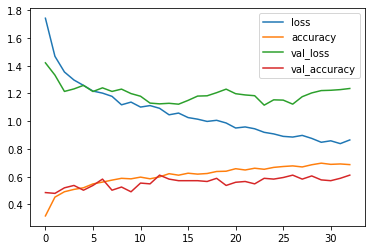

In [ ]:
pd.DataFrame(history.history).plot();

# Tune Params

In [ ]:
def load_model(lr=1e-4, dense_1=1020, dense_2=200):
    model = VGGFace(include_top=False, model='vgg16', weights='vggface',
           input_shape=(224, 224, 3), pooling=None, classes=7)
    
    model.trainable = False 
    model = tf.keras.models.Sequential([
                            model,
                            keras.layers.Flatten(),
                            keras.layers.Dense(dense_1, activation='relu'),
                            keras.layers.Dense(dense_2, activation='relu'),
                            keras.layers.Dense(7, activation='softmax')
                                ])
    
    opt = optimizers.Adam(learning_rate=lr)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

vg_face_model = load_model()

In [ ]:
keras.backend.clear_session()
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=20, verbose=1, restore_best_weights=True)
history = vg_face_model.fit(train_generator,
                            epochs=1,verbose=1,
                            validation_data=validation_generator,
                            callbacks=[es])

99/99 [==============================] - 37s 369ms/step - loss: 1.8672 - accuracy: 0.2390 - val_loss: 1.4289 - val_accuracy: 0.4914


# Learning Rate

In [ ]:
results_lr1 = {"lr":[], "acc":[]}
epochs = 1

for lr in np.linspace(1e-6, 1e-3, 20):
   keras.backend.clear_session()
   vg_face_model = load_model(lr=lr)
   vg_face_model.fit(train_generator, epochs=epochs, verbose=3, validation_data=validation_generator)
   results_lr1["lr"].append(lr)
   results_lr1["acc"].append(vg_face_model.evaluate(validation_generator)[1])  

6/6 [==============================] - 1s 117ms/step - loss: 1.4361 - accuracy: 0.4457


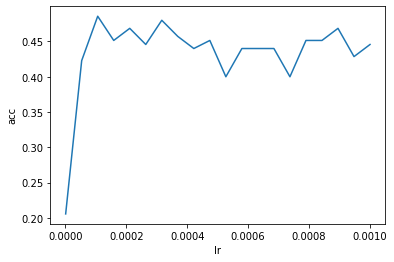

In [ ]:
res_lr1 = pd.DataFrame.from_dict(resultbs_lr1)

sns.lineplot(x="lr", y="acc", data=res_lr1);

In [ ]:
res_lr1.iloc[np.argmax(list(results_lr1["acc"]))]

lr     0.000106
acc    0.485714
Name: 2, dtype: float64

In [ ]:
results_lr2 = {"lr":[], "acc":[]}
epochs = 3

for lr in np.linspace(0.00009, 0.0009, 7):
   keras.backend.clear_session()
   vg_face_model = load_model(lr=lr)
   vg_face_model.fit(train_generator, epochs=epochs, verbose=3, validation_data=validation_generator)
   results_lr2["lr"].append(lr)
   results_lr2["acc"].append(vg_face_model.evaluate(validation_generator)[1])  

Epoch 1/3
Epoch 2/3
Epoch 3/3
6/6 [==============================] - 1s 119ms/step - loss: 1.3310 - accuracy: 0.4514
Epoch 1/3
Epoch 2/3
Epoch 3/3
6/6 [==============================] - 1s 118ms/step - loss: 1.3219 - accuracy: 0.5257
Epoch 1/3
Epoch 2/3
Epoch 3/3
6/6 [==============================] - 1s 119ms/step - loss: 1.2805 - accuracy: 0.4971
Epoch 1/3
Epoch 2/3
Epoch 3/3
6/6 [==============================] - 1s 116ms/step - loss: 1.2576 - accuracy: 0.5200
Epoch 1/3
Epoch 2/3
Epoch 3/3
6/6 [==============================] - 1s 117ms/step - loss: 1.2911 - accuracy: 0.5143
Epoch 1/3
Epoch 2/3
Epoch 3/3
6/6 [==============================] - 1s 116ms/step - loss: 1.3668 - accuracy: 0.5200
Epoch 1/3
Epoch 2/3
Epoch 3/3
6/6 [==============================] - 1s 121ms/step - loss: 1.3058 - accuracy: 0.5200


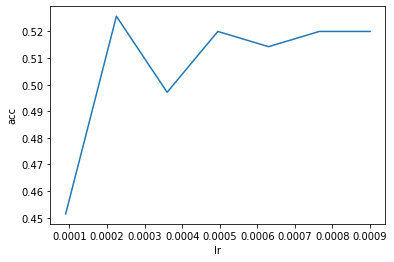

In [ ]:
res_lr2 = pd.DataFrame.from_dict(results_lr2)

sns.lineplot(x="lr", y="acc", data=res_lr2);

In [ ]:
res_lr2.iloc[np.argmax(list(results_lr2["acc"]))]

lr     0.000225
acc    0.525714
Name: 1, dtype: float64

# No. Dense Neruons

In [ ]:
results_den1_1 = {"n_dense":[], "acc":[]}
epochs = 1
dense_1 = [500, 700, 1000, 1200, 1900, 2000]

for n_d in dense_1:
   keras.backend.clear_session()
   vg_face_model = load_model(dense_1=n_d)
   vg_face_model.fit(train_generator, epochs=epochs, verbose=3, validation_data=validation_generator)
   results_den1_1["n_dense"].append(n_d)
   results_den1_1["acc"].append(vg_face_model.evaluate(validation_generator)[1])  

6/6 [==============================] - 1s 120ms/step - loss: 1.4275 - accuracy: 0.4457


In [ ]:
results_den1_1

{'acc': [0.4514285624027252,
  0.46857142448425293,
  0.46857142448425293,
  0.4514285624027252,
  0.4628571569919586,
  0.4457142949104309],
 'n_dense': [500, 700, 1000, 1200, 1900, 2000]}

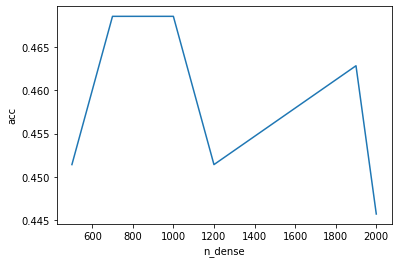

In [ ]:
res_den1_1 = pd.DataFrame.from_dict(results_den1_1)
sns.lineplot(x="n_dense", y="acc", data=res_den1_1);

In [ ]:
res_den1_1.iloc[np.argmax(list(results_den1_1["acc"]))]

n_dense    700.000000
acc          0.468571
Name: 1, dtype: float64

# Dense 2

In [ ]:
results_den2_1 = {"n_dense":[], "acc":[]}
epochs = 1
dense_2 = [100, 200, 300, 500, 700, 900]

for n_d in dense_2:
   keras.backend.clear_session()
   vg_face_model = load_model(dense_2=n_d)
   vg_face_model.fit(train_generator, epochs=epochs, verbose=3, validation_data=validation_generator)
   results_den2_1["n_dense"].append(n_d)
   results_den2_1["acc"].append(vg_face_model.evaluate(validation_generator)[1])  

6/6 [==============================] - 1s 117ms/step - loss: 1.4593 - accuracy: 0.4343


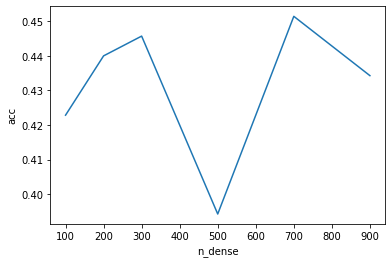

In [ ]:
res_den2_1 = pd.DataFrame.from_dict(results_den2_1)
sns.lineplot(x="n_dense", y="acc", data=res_den2_1);

In [ ]:
res_den2_1.iloc[np.argmax(list(results_den2_1["acc"]))]

n_dense    700.000000
acc          0.451429
Name: 4, dtype: float64

# Tuned Model

In [ ]:
lr = 0.000225
dense_1=1000
dense_2=700

vg_face_model = load_model(lr=lr, dense_1=dense_1, dense_2=dense_2)

keras.backend.clear_session()
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=20, verbose=1, restore_best_weights=True)
history = vg_face_model.fit(train_generator,
                            epochs=100,verbose=1,
                            validation_data=validation_generator,
                            callbacks=[es])

Epoch 1/100
99/99 [==============================] - 37s 369ms/step - loss: 1.8127 - accuracy: 0.2691 - val_loss: 1.3806 - val_accuracy: 0.4514
Epoch 2/100
99/99 [==============================] - 36s 365ms/step - loss: 1.4761 - accuracy: 0.4406 - val_loss: 1.3289 - val_accuracy: 0.4800
Epoch 3/100
99/99 [==============================] - 36s 366ms/step - loss: 1.3605 - accuracy: 0.4833 - val_loss: 1.3035 - val_accuracy: 0.5029
Epoch 4/100
99/99 [==============================] - 36s 365ms/step - loss: 1.2619 - accuracy: 0.5285 - val_loss: 1.2620 - val_accuracy: 0.5029
Epoch 5/100
99/99 [==============================] - 36s 365ms/step - loss: 1.2265 - accuracy: 0.5437 - val_loss: 1.2231 - val_accuracy: 0.5429
Epoch 6/100
99/99 [==============================] - 36s 366ms/step - loss: 1.1837 - accuracy: 0.5651 - val_loss: 1.3500 - val_accuracy: 0.5486
Epoch 7/100
99/99 [==============================] - 36s 365ms/step - loss: 1.1545 - accuracy: 0.5825 - val_loss: 1.2232 - val_accuracy:

In [ ]:
vg_face_model.evaluate(validation_generator)

6/6 [==============================] - 1s 120ms/step - loss: 1.4265 - accuracy: 0.6457


[1.4264634847640991, 0.645714282989502]

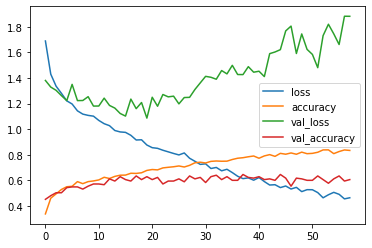

In [ ]:
pd.DataFrame(history.history).plot();

# Try on 3000 Set

In [ ]:
!unzip /content/data_3000_comprred.zip

In [ ]:
data = "/content/data_3000/"
classes = ['surprise',
            "fear",
            "contempt",
            "disgust",
            "anger",
            "neutrality",
            "sadness",
            "happiness"]
check_dr = [data+"/train/", data+"/val/", data+"/test/"]
for dr in check_dr:
    print(f"##########{dr}###########")
    for dir_ in os.listdir(dr):
        count = 0
        for f in os.listdir(dr + dir_ + "/"):
            count += 1
        print(f"{dir_}:   \t {count} images")

##########/content/data_3000//train/###########
neutrality:   	 2700 images
disgust:   	 2700 images
anger:   	 2700 images
surprise:   	 2700 images
happiness:   	 2700 images
sadness:   	 2700 images
fear:   	 2700 images
##########/content/data_3000//val/###########
neutrality:   	 150 images
disgust:   	 150 images
anger:   	 150 images
surprise:   	 150 images
happiness:   	 150 images
sadness:   	 150 images
fear:   	 150 images
##########/content/data_3000//test/###########
neutrality:   	 150 images
disgust:   	 150 images
anger:   	 150 images
surprise:   	 150 images
happiness:   	 150 images
sadness:   	 150 images
fear:   	 150 images


In [ ]:
train_dir = data+'train/'
train_datagen = ImageDataGenerator(rescale=1.0/255., 
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest'
                                    )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    classes=['surprise',
                                                            "fear",
                                                            "disgust",
                                                            "anger",
                                                            "neutrality",
                                                            "sadness",
                                                            "happiness"],
                                                    class_mode="categorical",
                                                    color_mode="rgb",
                                                    target_size=(224, 224))
val_dir= data+'val/'
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              batch_size=32,
                                                              classes=['surprise',
                                                                        "fear",
                                                                        "disgust",
                                                                        "anger",
                                                                        "neutrality",
                                                                        "sadness",
                                                                        "happiness"],
                                                              class_mode="categorical",
                                                              color_mode="rgb",
                                                              target_size=(224, 224)
                                                             
                                                             )

Found 18900 images belonging to 7 classes.
Found 1050 images belonging to 7 classes.


In [ ]:
lr = 0.000225
dense_1=1000
dense_2=700

vg_face_model_3000 = load_model(lr=lr, dense_1=dense_1, dense_2=dense_2)

keras.backend.clear_session()
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=30, verbose=1, restore_best_weights=True)
history_3000 = vg_face_model_3000.fit(train_generator,
                            epochs=100,verbose=1,
                            validation_data=validation_generator,
                            callbacks=[es])

Epoch 1/100
591/591 [==============================] - 217s 365ms/step - loss: 1.5632 - accuracy: 0.3937 - val_loss: 1.1368 - val_accuracy: 0.5743
Epoch 2/100
591/591 [==============================] - 216s 365ms/step - loss: 1.2343 - accuracy: 0.5403 - val_loss: 1.0361 - val_accuracy: 0.6038
Epoch 3/100
591/591 [==============================] - 216s 365ms/step - loss: 1.1584 - accuracy: 0.5743 - val_loss: 1.0212 - val_accuracy: 0.6190
Epoch 4/100
591/591 [==============================] - 215s 364ms/step - loss: 1.1137 - accuracy: 0.5856 - val_loss: 1.0001 - val_accuracy: 0.6390
Epoch 5/100
591/591 [==============================] - 215s 364ms/step - loss: 1.0748 - accuracy: 0.6039 - val_loss: 0.9804 - val_accuracy: 0.6429
Epoch 6/100
591/591 [==============================] - 215s 363ms/step - loss: 1.0574 - accuracy: 0.6101 - val_loss: 0.9841 - val_accuracy: 0.6390
Epoch 7/100
591/591 [==============================] - 215s 363ms/step - loss: 1.0285 - accuracy: 0.6257 - val_loss: 0

In [ ]:
from google.colab import files

vg_face_model_3000.save("vg_face_model")
!zip -r /content/drive/MyDrive/picturing_emotions/models/vg_face_model.zip vg_face_model
#files.download("vg_face_model.zip")

INFO:tensorflow:Assets written to: vg_face_model/assets
  adding: vg_face_model/ (stored 0%)
  adding: vg_face_model/variables/ (stored 0%)
  adding: vg_face_model/variables/variables.index (deflated 66%)
  adding: vg_face_model/variables/variables.data-00000-of-00001 (deflated 13%)
  adding: vg_face_model/assets/ (stored 0%)
  adding: vg_face_model/saved_model.pb (deflated 91%)


In [ ]:
vg_face_model_3000.evaluate(validation_generator)

33/33 [==============================] - 4s 119ms/step - loss: 1.2044 - accuracy: 0.7067


[1.204420804977417, 0.7066666483879089]

data_3000		data_500		 img_15552.png	vg_face_model
data_3000_comprred.zip	data_500_compressed.zip  sample_data


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("vg_face_model") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('vg_face.tflite', 'wb') as f:
  f.write(tflite_model)

# Try Different 

In [ ]:
test_dir = "/content/data_500/test"
test_datagen = ImageDataGenerator(rescale=1.0/255.)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    batch_size=1,
                                                    classes=['surprise',
                                                            "fear",
                                                            "disgust",
                                                            "anger",
                                                            "neutrality",
                                                            "sadness",
                                                            "happiness"],
                                                    class_mode="categorical",
                                                    color_mode="rgb",
                                                    target_size=(224, 224)
                                                    
                                                    )

Found 175 images belonging to 7 classes.


In [ ]:
preds = vg_face_model.predict(test_generator)

In [ ]:
test_generator[0][0].shape,test_generator[0][1].shape

((1, 224, 224, 3), (1, 7))

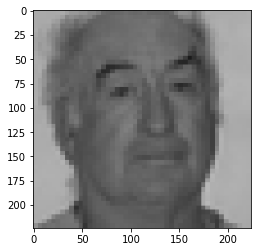

In [ ]:
test_generator[0][0].

classes[list(test_generator[0][1][0]).index(1.)]

'anger'

In [ ]:
 vg_face_model.predict(test_generator[0][0])

array([[2.5684179e-03, 2.3321935e-03, 6.9639519e-02, 6.4597180e-04,
        8.9411837e-01, 1.9757589e-02, 1.0937982e-02]], dtype=float32)

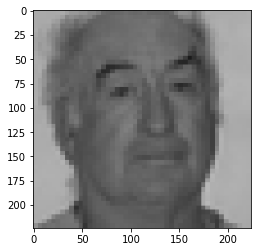

>>>>>>>> neutrality
surprise    	 0.002568418
fear    	 0.0023321935
disgust    	 0.06963952
anger    	 0.0006459718
neutrality    	 0.89411837
sadness    	 0.01975759
happiness    	 0.010937982


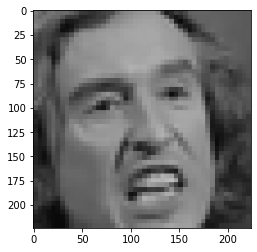

>>>>>>>> neutrality
surprise    	 0.0018830637
fear    	 0.0018856011
disgust    	 3.6608482e-05
anger    	 0.43416435
neutrality    	 1.1709687e-06
sadness    	 2.439929e-06
happiness    	 0.56202674


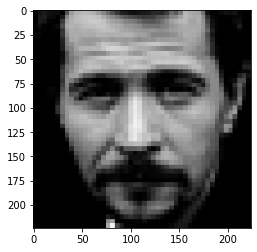

>>>>>>>> neutrality
surprise    	 0.00044983742
fear    	 0.008950707
disgust    	 0.0031442326
anger    	 0.03456986
neutrality    	 0.0068111694
sadness    	 0.94603693
happiness    	 3.7313268e-05


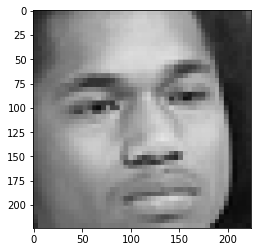

>>>>>>>> neutrality
surprise    	 0.0005912009
fear    	 0.00020919493
disgust    	 2.0539194e-07
anger    	 0.008060977
neutrality    	 0.76093704
sadness    	 0.230175
happiness    	 2.6434616e-05


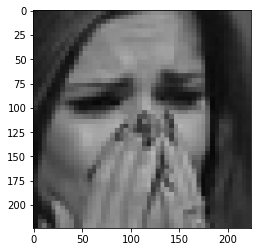

>>>>>>>> neutrality
surprise    	 0.001667635
fear    	 0.33195224
disgust    	 0.1952379
anger    	 0.011376077
neutrality    	 0.0001209582
sadness    	 0.4590136
happiness    	 0.00063144503


In [ ]:
classes=['surprise',
        "fear",
        "disgust",
        "anger",
        "neutrality",
        "sadness",
        "happiness"]

for i in range(5):
    plt.imshow(np.squeeze(test_generator[i][0]), cmap="gray")
    plt.show()
    print(">>>>>>>>",classes[list(test_generator[0][1][0]).index(1.)])
    preds = vg_face_model.predict(test_generator[i][0])[0]
    for class_ in range(len(classes)):
        print(classes[class_], "   \t", preds[class_])


In [ ]:
!zip -r /content/vg_face_model.zip /content/vg_face_model

  adding: content/vg_face_model/ (stored 0%)
  adding: content/vg_face_model/variables/ (stored 0%)
  adding: content/vg_face_model/variables/variables.data-00000-of-00001 (deflated 11%)
  adding: content/vg_face_model/variables/variables.index (deflated 67%)
  adding: content/vg_face_model/saved_model.pb (deflated 91%)
  adding: content/vg_face_model/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download("/content/vg_face_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>